# Bikes example with different values of $m$, $\alpha$ and $\beta$

In [1]:
import warnings

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc as pm
import pymc_bart as pmb
from pymc_bart.pgbart import compute_prior_probability

warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
RANDOM_SEED = 4579
np.random.seed(RANDOM_SEED)
az.style.use("arviz-white")
plt.rcParams["figure.dpi"] = 300

## Biking with BART

In [3]:
bikes = pd.read_csv("bikes.csv")

X = bikes[["hour", "temperature", "humidity", "windspeed"]]
Y = bikes["count"]

In [4]:
trees = [10, 20, 50, 100, 200]
alphas = [0.1, 0.45, 0.95]
betas = [1, 2, 10]

idatas_bikes = {
    "10": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "20": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "50": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "100": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "200": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
}

m_trees = {
    "10": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "20": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "50": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "100": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "200": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
}

In [5]:
for m in trees:
    for alpha in alphas:
        for beta in betas:
            with pm.Model() as model_bikes:
                α = pm.Exponential("α", 0.1)
                μ_ = pmb.BART("μ_", X, np.log(Y), m=m, alpha=alpha, beta=beta)
                μ = pm.Deterministic("μ", np.exp(μ_))
                y = pm.NegativeBinomial("y", mu=μ, alpha=α, observed=Y)
                idata = pm.sample(
                    tune=1000,
                    draws=1000,
                    chains=4,
                    random_seed=RANDOM_SEED,
                    compute_convergence_checks=False,
                    idata_kwargs={"log_likelihood": True},
                )
                idatas_bikes[f"{m}"][f"{alpha}"][f"{beta}"] = idata
                m_trees[f"{m}"][f"{alpha}"][f"{beta}"] = μ_.owner.op.all_trees

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 7 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 8 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 11 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 10 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 9 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 12 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 22 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 17 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 18 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 25 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 49 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 43 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 36 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 35 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 34 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 48 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 48 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 48 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 98 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 85 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 70 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 67 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 67 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 70 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 97 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 99 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 99 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 209 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 177 seconds.


Output()

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [α]
>PGBART: [μ_]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 138 seconds.


Output()

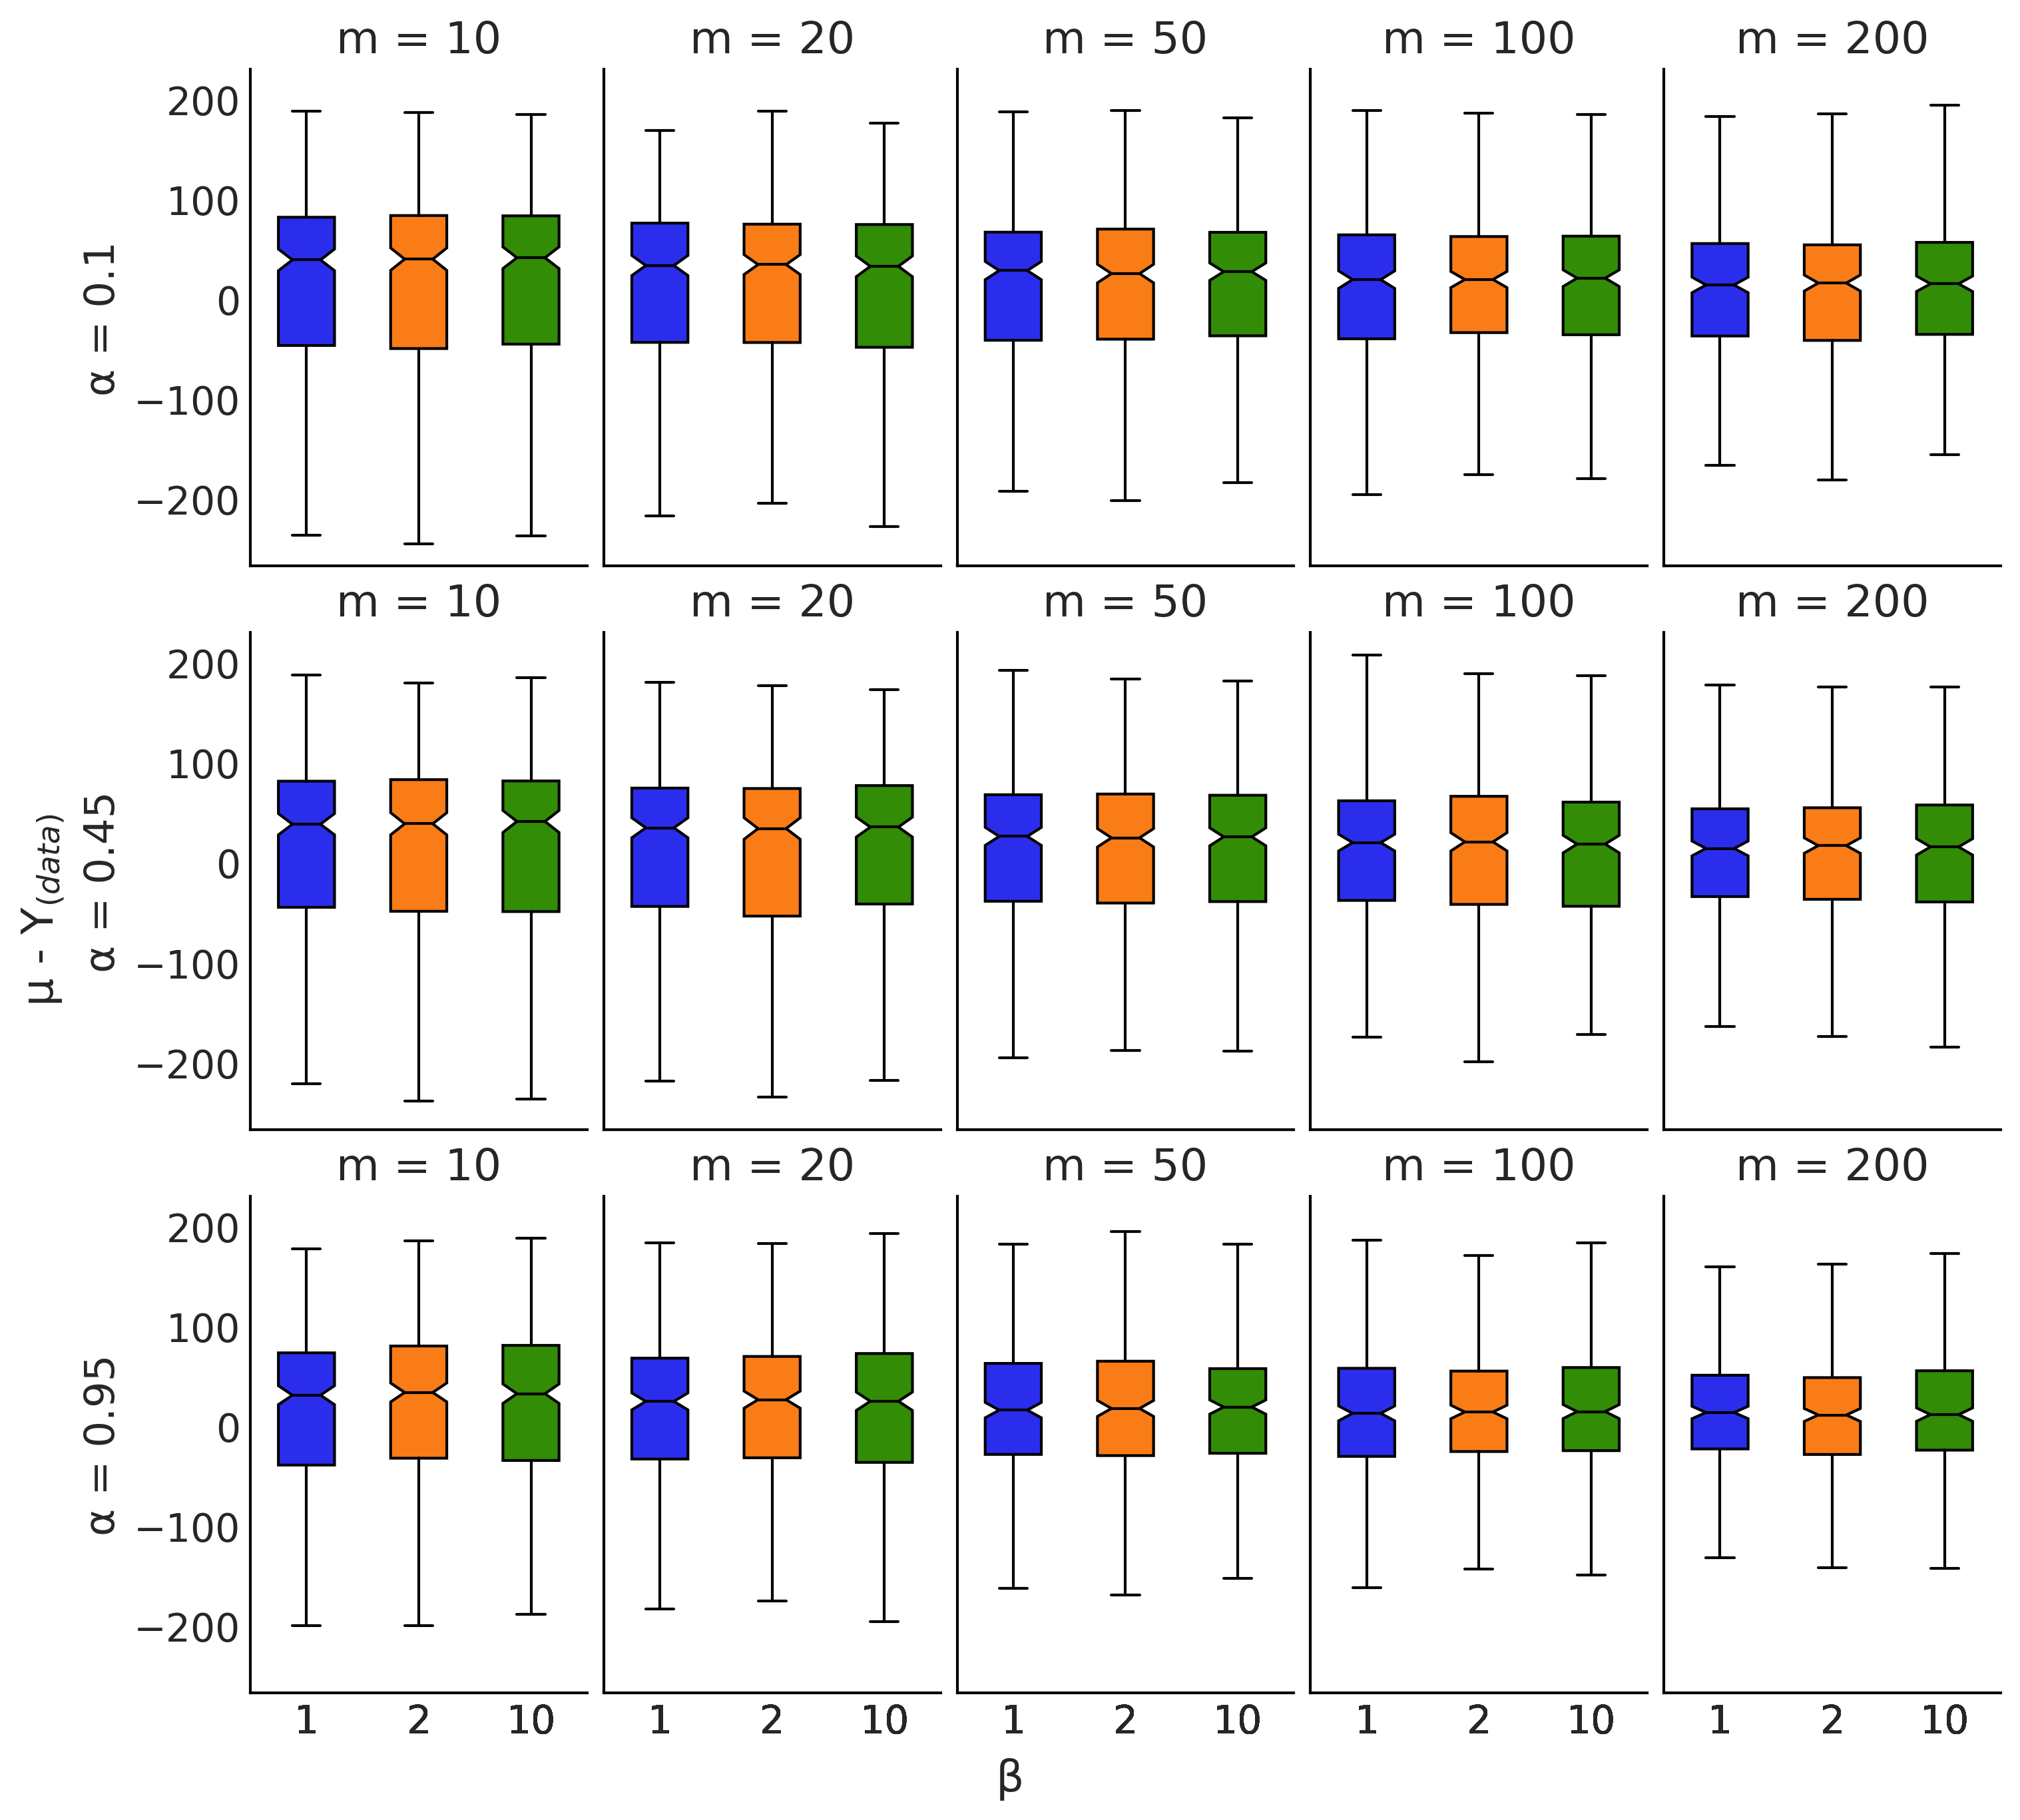

In [6]:
fig, axes = plt.subplots(
    len(alphas), len(trees), figsize=(10, 9), sharey=True, sharex=True
)

axes = axes.ravel()

i = 0
for alpha in alphas:
    for m in trees:
        ax = axes[i]
        means = [
            idatas_bikes[str(m)][str(alpha)][str(beta)]["posterior"]["μ"].mean(
                ("chain", "draw")
            )
            - Y
            for beta in betas
        ]
        box = ax.boxplot(
            means,
            notch=True,
            patch_artist=True,
            widths=0.5,
            labels=betas,
            showfliers=False,
            medianprops=dict(color="k"),
        )
        for patch, color in zip(box["boxes"], ["C0", "C1", "C2"]):
            patch.set_facecolor(color)
            ax.set_title(f"m = {m}")
        i += 1

axes[0].set_ylabel("α = 0.1")
axes[5].set_ylabel("α = 0.45")
axes[10].set_ylabel("α = 0.95")
fig.supxlabel(r"β", fontsize=16)
fig.supylabel(r"μ - Y$_{(data)}$", fontsize=16)

plt.savefig("boxplots_bikes.png");

## PSIS-LOO-CV

In [7]:
model_compare = az.compare(
    {
        "m10": idatas_bikes["10"]["0.95"]["2"],
        "m20": idatas_bikes["20"]["0.95"]["2"],
        "m50": idatas_bikes["50"]["0.95"]["2"],
        "m100": idatas_bikes["100"]["0.95"]["2"],
        "m200": idatas_bikes["200"]["0.95"]["2"],
    }
)

/home/miriana/anaconda3/envs/bart-experiments/lib/python3.10/site-packages/arviz/stats/stats.py:1024: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/home/miriana/anaconda3/envs/bart-experiments/lib/python3.10/site-packages/arviz/stats/stats.py:789: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/home/miriana/anaconda3/envs/bart-experiments/lib/python3.10/site-packages/arviz/stats/stats.py:1024: RuntimeWarning: overflow encountered in exp
  weights = 1 / np.exp(len_scale - len_scale[:, None]).sum(axis=1)
/home/miriana/anaconda3/envs/bart-experiments/lib/python3.10/site-packages/arviz/st

In [8]:
model_compare

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
m200,0,-1968.487600,38.890638,0.000000,1.000000e+00,23.791442,0.000000,True,log
m100,1,-1999.212590,43.275209,30.724990,4.081471e-10,24.438463,9.586062,True,log
m50,2,-2036.499769,45.406249,68.012169,2.188088e-10,24.958314,9.497920,True,log
m20,3,-2067.505639,65.224610,99.018038,1.067953e-10,26.756596,12.535931,True,log
m10,4,-2096.049866,65.006118,127.562265,0.000000e+00,26.914575,15.415719,True,log


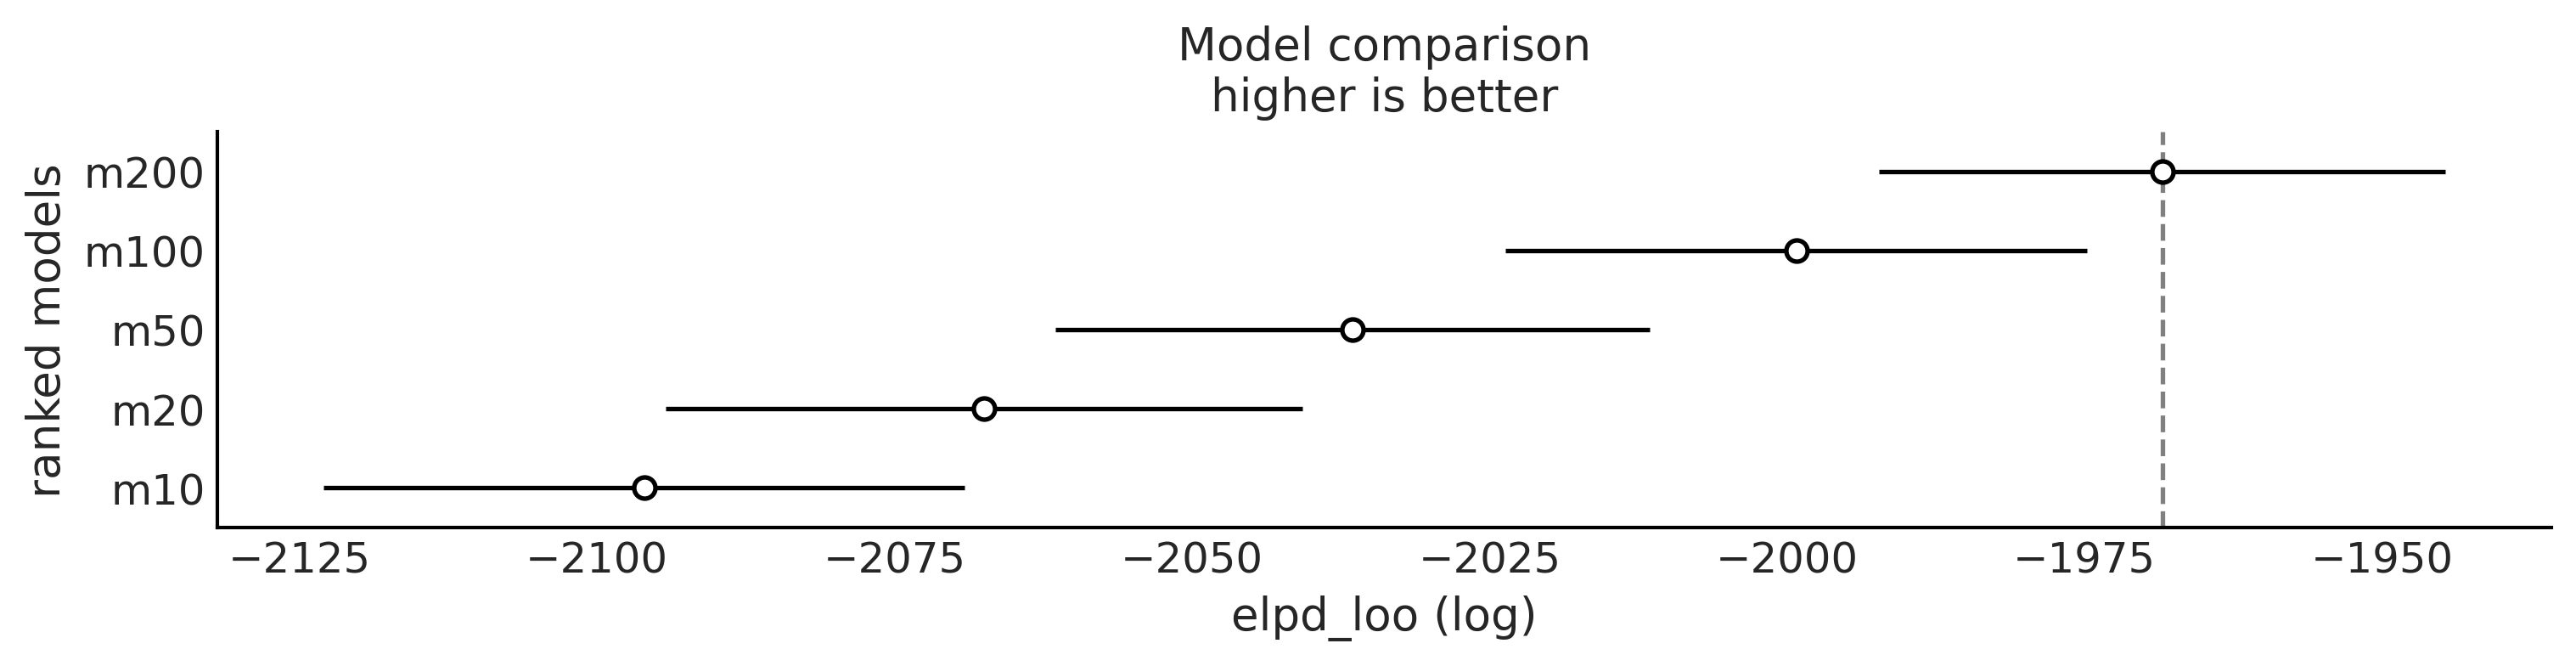

In [9]:
az.plot_compare(
    model_compare,
    plot_ic_diff=False,
    insample_dev=False,
    figsize=(10, 2.5),
    legend=False,
)
plt.savefig("loo_bikes-trees-alphas.png")

## Tree extraction  

In [10]:
trees_length = {
    "10": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "20": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "50": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "100": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
    "200": {
        "0.1": {"1": {}, "2": {}, "10": {}},
        "0.45": {"1": {}, "2": {}, "10": {}},
        "0.95": {"1": {}, "2": {}, "10": {}},
    },
}

In [11]:
for m in trees:
    for alpha in alphas:
        for beta in betas:
            tmp_list = []
            chain = m_trees[str(m)][str(alpha)][str(beta)]
            for sample in chain:
                for trees_s in sample:
                    for tree_t in trees_s:
                        index = max(tree_t.tree_structure.keys())
                        tmp_list.append(pmb.tree.get_depth(index))
            trees_length[f"{m}"][f"{alpha}"][f"{beta}"] = pd.Series(tmp_list)

In [12]:
# Trees' depth probabilities based on alpha and beta values
prob_alphas_betas = {
    "0.1": {"1": {}, "2": {}, "10": {}},
    "0.45": {"1": {}, "2": {}, "10": {}},
    "0.95": {"1": {}, "2": {}, "10": {}},
}
for alpha in alphas:
    for beta in betas:
        q = compute_prior_probability(alpha, beta)
        p = 1 - np.array(q)
        p = p / p.sum()
        prob_alphas_betas[f"{alpha}"][f"{beta}"] = p

### Frequency of trees depths

In [13]:
wd = 0.33
wd_lst = [0, wd, wd * 2]

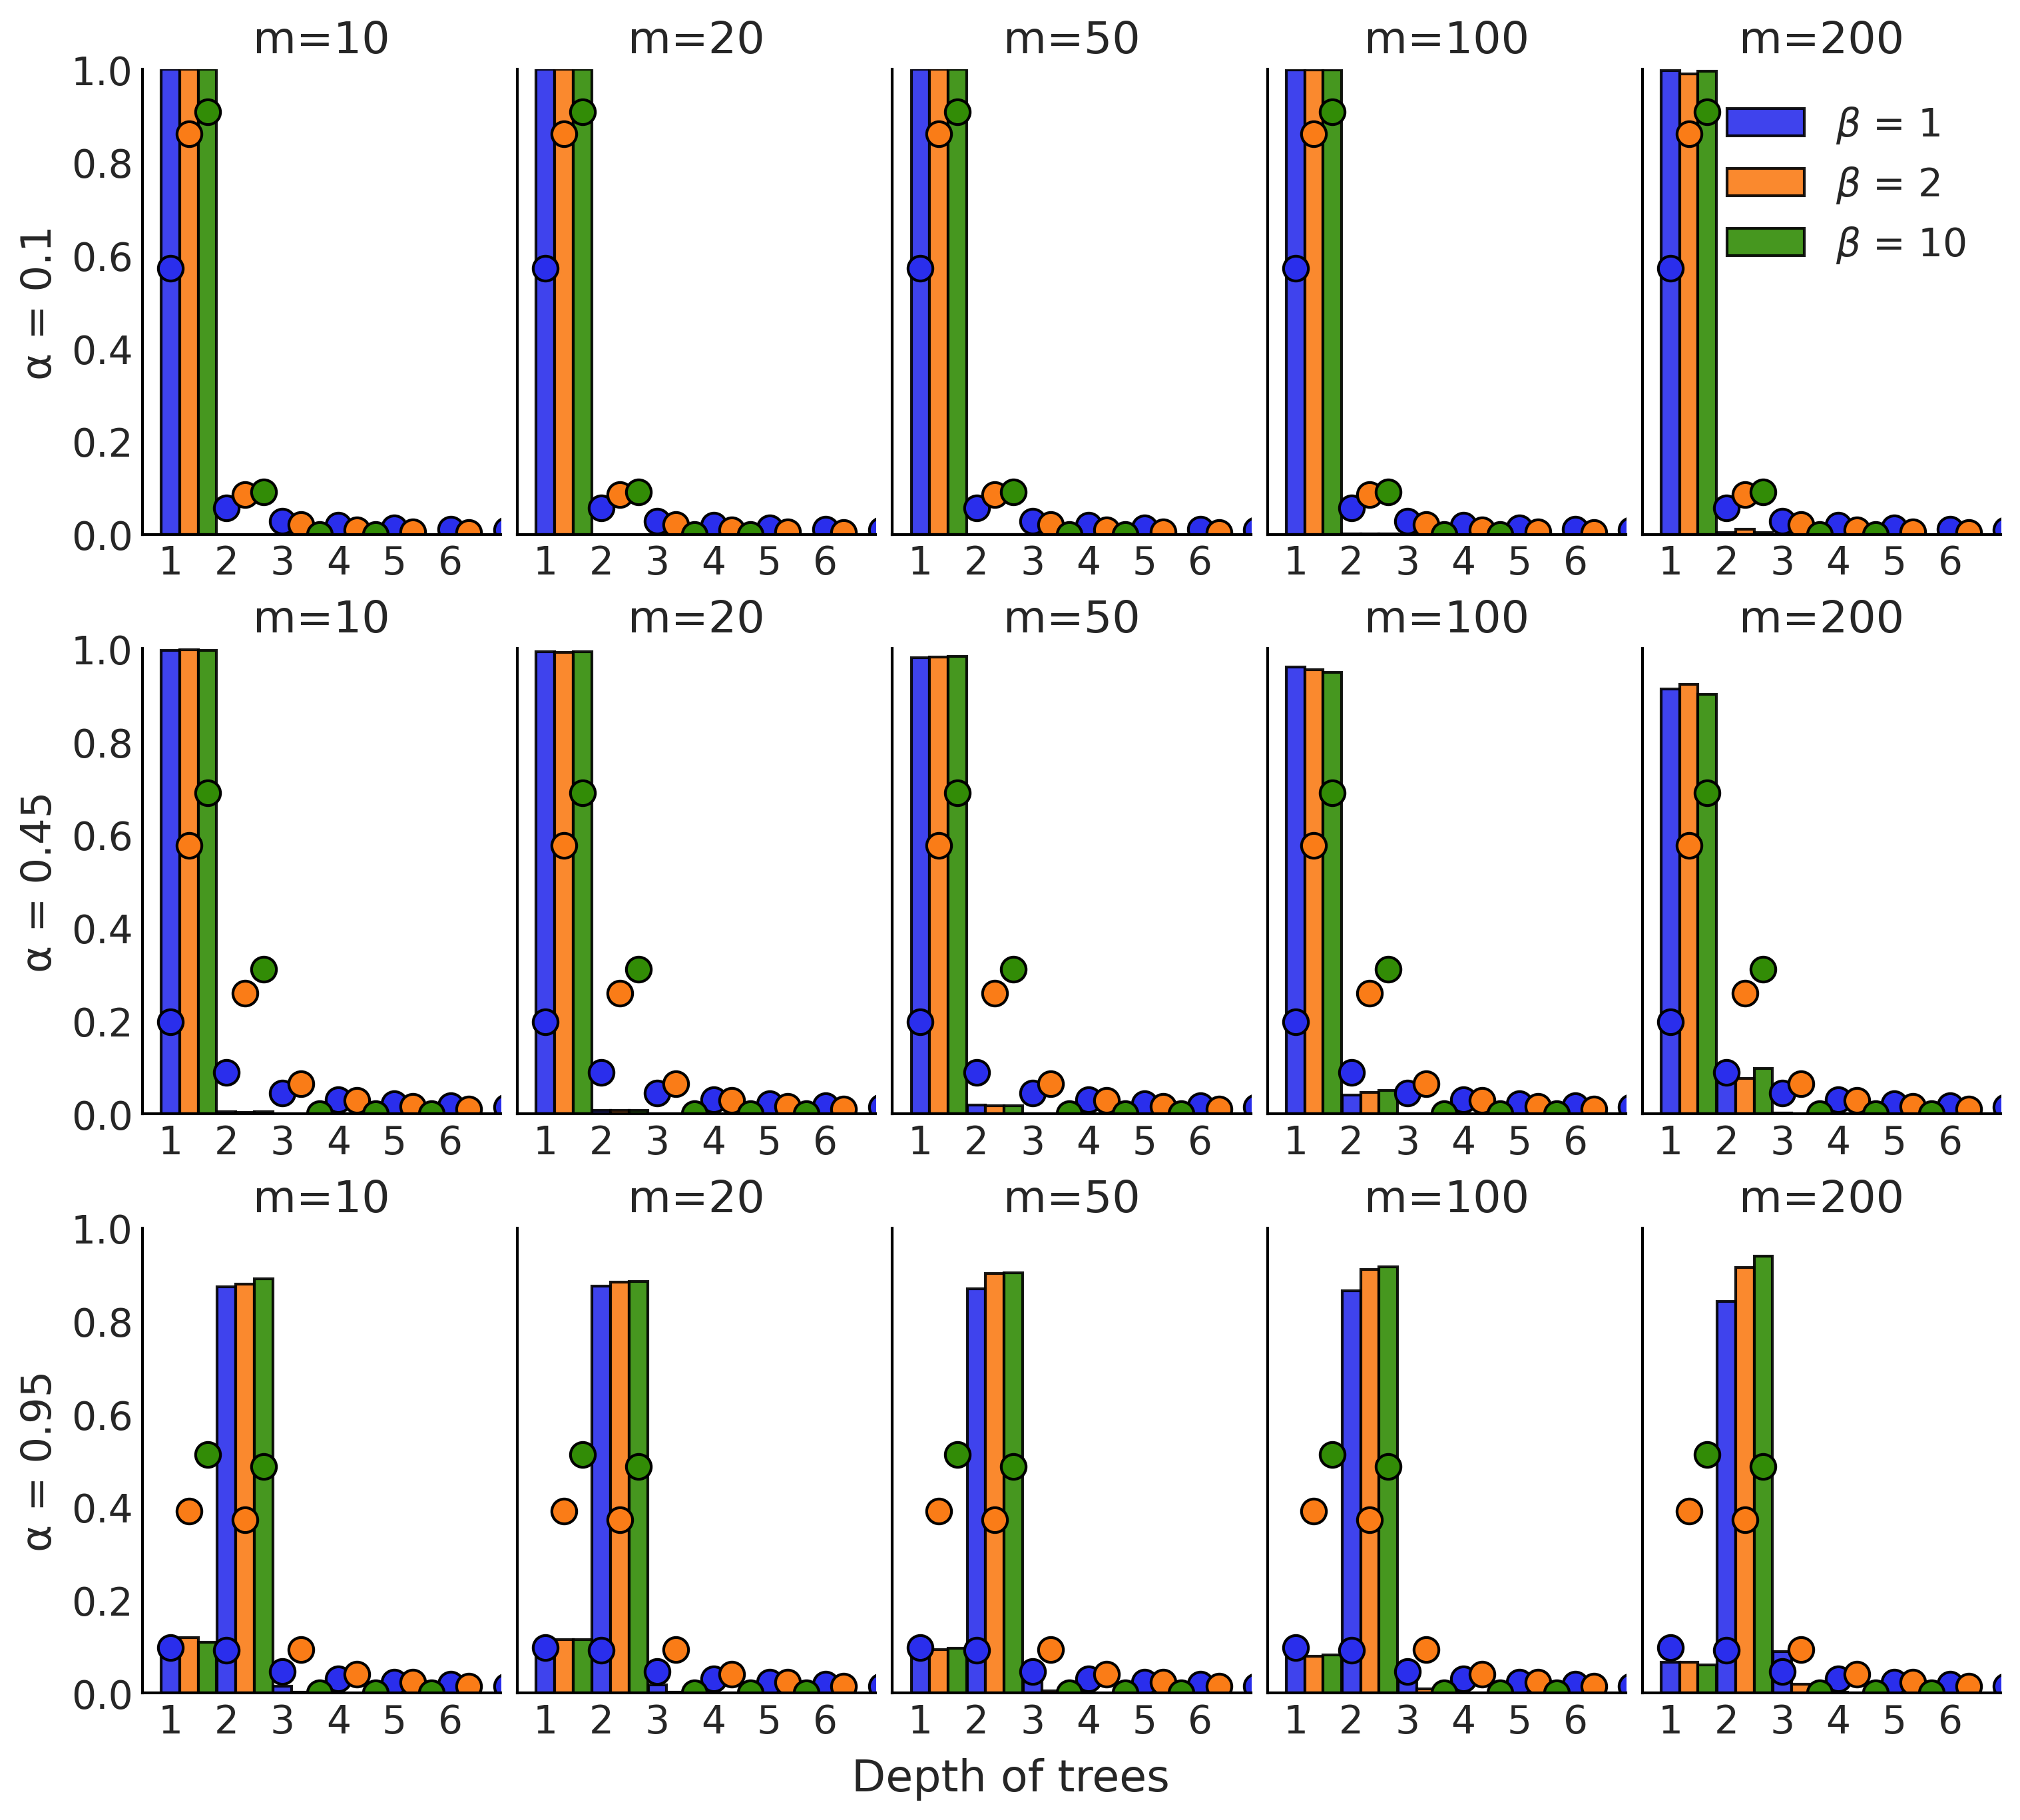

In [14]:
# All frequencies in one plot
fig, axes = plt.subplots(len(alphas), len(trees), figsize=(10, 9), sharey=True)

axes = axes.ravel()

i = 0
for alpha in alphas:
    for m in trees:
        ax = axes[i]
        for j, beta in enumerate(betas):
            # Trees Depth Frequencies
            frequency = (
                trees_length[f"{m}"][f"{alpha}"][f"{beta}"]
                .value_counts(normalize=True)
                .sort_index(ascending=True)
            )
            ax.bar(
                frequency.index + wd_lst[j],
                frequency.values,
                color=f"C{j}",
                width=wd,
                edgecolor="k",
                alpha=0.9,
                label=rf"$\beta$ = {beta}",
            )
            # Probabilities
            x = (
                np.array(range(1, len(prob_alphas_betas[f"{alpha}"][f"{beta}"]) + 1))
                + wd_lst[j]
            )
            ax.scatter(
                x,
                prob_alphas_betas[f"{alpha}"][f"{beta}"],
                facecolor=f"C{j}",
                edgecolor="k",
                marker="o",
                s=80,
                zorder=2,
            )
        i += 1

        major_ticks = np.arange(0, 7, 1)
        ax.set_xticks(major_ticks)
        ax.set_ylim(0, 1)
        ax.set_xlim(0.5, 6.9)
        ax.set_title(f"m={m}")

axes[4].legend()
axes[0].set_ylabel("α = 0.1")
axes[5].set_ylabel("α = 0.45")
axes[10].set_ylabel("α = 0.95")

fig.supxlabel("Depth of trees", fontsize=16)


plt.savefig("bikes_trees_alphas_hist.png");